In [116]:
#importing packages
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
import collections
import random
import csv
import IPython
from IPython.display import display
from sklearn.cross_validation import train_test_split



##loading data using exception handling

loan_data = "D:\dataset\loan_LC.csv"

try:
    loan_data = pd.read_csv("D:\dataset\loan_LC.csv",low_memory = False,skiprows = 1,delimiter = ',')
    print("The dataset has {} sample {} with feature ".format(*loan_data.shape))
except:
    print("Something Went Wrong...")

The dataset has 42538 sample 145 with feature 


In [117]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status   issue_d  loan_status pymnt_plan  url                                               desc         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  \
0  NaN        NaN     5000.0       5000.0           4975.0   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT     24000.0            Verified  Dec-2011   Fully Paid          n  NaN    Borrower added on 12/22/11 > I need to upgra...     credit_card              Computer    860xx         AZ  27.65          0.0         Jan-1985             1.0                     NaN                     NaN       3.0      0.0    13648.0      83.7%        9.0                   f        0.0            0.0   5863.155187          5833.84          5000.00         863.16                0.00         0.0                     0.00     Jan-2015           171.62          NaN           May-2018                         0.0                          NaN          1.0       Individual               NaN        NaN                        NaN             0.0           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN   
1  NaN        NaN     2500.0       2500.0           2500.0   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-2011  Charged Off          n  NaN    Borrower added on 12/22/11 > I plan to use t...             car                  bike    309xx         GA   1.00          0.0         Apr-1999             5.0                     NaN                     NaN       3.0      0.0     1687.0       9.4%        4.0                   f        0.0            0.0   1014.530000          1014.53           456.46         435.17                0.00       122.9                     1.11     Apr-2013           119.66          NaN           Oct-2016                         0.0                          NaN          1.0       Individual               NaN        NaN                        NaN             0.0           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN   
2  NaN        NaN     2400.0       2400.0           2400.0   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT     12252.0        Not Verified  Dec-2011   Fully Paid          n  NaN                                                NaN  small_business  real estate business    606xx         IL   8.72          0.0         Nov-2001             2.0                     NaN                     NaN       2.0      0.0     2956.0      98.5%       10.0                   f        0.0            0.0   3005.666844          3005.67          2400.00         605.67                0.00         0.0                     0.00     Jun-2014           649.91          NaN           Jun-2017                         0.0                          NaN          1.0       Individual               NaN        NaN                        NaN             0.0           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN   
3  NaN        Na

In [118]:
pd.set_option('display.height',1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

loan_data


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                                          emp_title emp_length home_ownership  annual_inc verification_status   issue_d                                        loan_status pymnt_plan  url                                               desc             purpose                                     title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint  \
0                                                  NaN        NaN     5000.0       5000.0      4975.000000   36 months   10.65%       162.87     B        B2                                                NaN  10+ years           RENT    24000.00            Verified  Dec-2011                                         Fully Paid          n  NaN    Borrower added on 12/22/11 > I need to upgra...         credit_card                                  Computer    860xx         AZ  27.65          0.0         Jan-1985             1.0                     NaN                     NaN       3.0      0.0    13648.0      83.7%        9.0                   f        0.0            0.0   5863.155187          5833.84          5000.00         863.16            0.000000        0.00                   0.0000     Jan-2015           171.62          NaN           May-2018                         0.0                          NaN          1.0       Individual               NaN        NaN   
1                                                  NaN        NaN     2500.0       2500.0      2500.000000   60 months   15.27%        59.83     C        C4                                              Ryder   < 1 year           RENT    30000.00     Source Verified  Dec-2011                                        Charged Off          n  NaN    Borrower added on 12/22/11 > I plan to use t...                 car                                      bike    309xx         GA   1.00          0.0         Apr-1999             5.0                     NaN                     NaN       3.0      0.0     1687.0       9.4%        4.0                   f        0.0            0.0   1014.530000          1014.53           456.46         435.17            0.000000      122.90                   1.1100     Apr-2013           119.66          NaN           Oct-2016                         0.0                          NaN          1.0       Individual               NaN        NaN   
2                                                  NaN        NaN     2400.0       2400.0      2400.000000   36 months   15.96%        84.33     C        C5                                                NaN  10+ years           RENT    12252.00        Not Verified  Dec-2011                                         Fully Paid          n  NaN                                                NaN      small_business                      real estate business    606xx         IL   8.72          0.0         Nov-2001             2.0                     NaN                     NaN       2.0      0.0     2956.0      98.5%       10.0                   f        0.0            0.0   3005.666844          3005.67          2400.00         605.67            0.000000        0.00                   0.0000     Jun-2014           649.91          NaN           Jun-2017                         0.0                          NaN          1.0       Individual               NaN        NaN   
3                                                  NaN        NaN    10000.0      10000.0     10000.000000   36 months   13.49%       339.31     C  

In [119]:
loan_data.iloc[0]

id                                                                                          NaN
member_id                                                                                   NaN
loan_amnt                                                                                  5000
funded_amnt                                                                                5000
funded_amnt_inv                                                                            4975
term                                                                                  36 months
int_rate                                                                                 10.65%
installment                                                                              162.87
grade                                                                                         B
sub_grade                                                                                    B2
emp_title                               

In [120]:
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status   issue_d  loan_status pymnt_plan  url                                               desc         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt next_pymnt_d last_credit_pull_d  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code application_type  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  \
0  NaN        NaN     5000.0       5000.0           4975.0   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT     24000.0            Verified  Dec-2011   Fully Paid          n  NaN    Borrower added on 12/22/11 > I need to upgra...     credit_card              Computer    860xx         AZ  27.65          0.0         Jan-1985             1.0                     NaN                     NaN       3.0      0.0    13648.0      83.7%        9.0                   f        0.0            0.0   5863.155187          5833.84          5000.00         863.16                0.00         0.0                     0.00     Jan-2015           171.62          NaN           May-2018                         0.0                          NaN          1.0       Individual               NaN        NaN                        NaN             0.0           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN   
1  NaN        NaN     2500.0       2500.0           2500.0   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-2011  Charged Off          n  NaN    Borrower added on 12/22/11 > I plan to use t...             car                  bike    309xx         GA   1.00          0.0         Apr-1999             5.0                     NaN                     NaN       3.0      0.0     1687.0       9.4%        4.0                   f        0.0            0.0   1014.530000          1014.53           456.46         435.17                0.00       122.9                     1.11     Apr-2013           119.66          NaN           Oct-2016                         0.0                          NaN          1.0       Individual               NaN        NaN                        NaN             0.0           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN   
2  NaN        NaN     2400.0       2400.0           2400.0   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT     12252.0        Not Verified  Dec-2011   Fully Paid          n  NaN                                                NaN  small_business  real estate business    606xx         IL   8.72          0.0         Nov-2001             2.0                     NaN                     NaN       2.0      0.0     2956.0      98.5%       10.0                   f        0.0            0.0   3005.666844          3005.67          2400.00         605.67                0.00         0.0                     0.00     Jun-2014           649.91          NaN           Jun-2017                         0.0                          NaN          1.0       Individual               NaN        NaN                        NaN             0.0           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN   
3  NaN        Na

In [121]:
loan_data = loan_data.drop(['desc', 'url'],axis=1)

In [122]:
loan_data.describe()

member_id     loan_amnt   funded_amnt  funded_amnt_inv   installment    annual_inc           dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  mths_since_last_record      open_acc       pub_rec     revol_bal     total_acc  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee    recoveries  collection_recovery_fee  last_pymnt_amnt  collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  annual_inc_joint  dti_joint  verification_status_joint  acc_now_delinq  tot_coll_amt  tot_cur_bal  open_acc_6m  open_act_il  open_il_12m  open_il_24m  mths_since_rcnt_il  total_bal_il  il_util  open_rv_12m  open_rv_24m  max_bal_bc  all_util  total_rev_hi_lim  inq_fi  total_cu_tl  inq_last_12m  acc_open_past_24mths  avg_cur_bal  bc_open_to_buy  bc_util  chargeoff_within_12_mths   delinq_amnt  mo_sin_old_il_acct  mo_sin_old_rev_tl_op  mo_sin_rcnt_rev_tl_op  mo_sin_rcnt_tl  mort_acc  mths_since_recent_bc  \
count        0.0  42535.000000  42535.000000     42535.000000  42535.000000  4.253100e+04  42535.000000  42506.000000    42506.000000            15609.000000             3651.000000  42506.000000  42506.000000  4.253500e+04  42506.000000    42535.0        42535.0  42535.000000     42535.000000     42535.000000   42535.000000        42535.000000  42535.000000             42535.000000     42535.000000                     42390.0                          0.0      42535.0               0.0        0.0                        0.0    42506.000000           0.0          0.0          0.0          0.0          0.0          0.0                 0.0           0.0      0.0          0.0          0.0         0.0       0.0               0.0     0.0          0.0           0.0                   0.0          0.0             0.0      0.0                   42390.0  42506.000000                 0.0                   0.0                    0.0             0.0       0.0                   0.0   
mean         NaN  11089.722581  10821.585753     10139.830603    322.623063  6.913656e+04     13.373043      0.152449        1.081424               35.017618               59.175568      9.343951      0.058156  1.429786e+04     22.124406        0.0            0.0  12019.976820     11312.525863      9675.675936    2239.981444            1.516890    102.802643                14.349535      2613.245652                         0.0                          NaN          1.0               NaN        NaN                        NaN        0.000094           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN               NaN     NaN          NaN           NaN                   NaN          NaN             NaN      NaN                       0.0      0.143039                 NaN                   NaN                    NaN             NaN       NaN                   NaN   
std          NaN   7410.938391   7146.914675      7131.686447    208.927216  6.409635e+04      6.726315      0.512406        1.527455               22.418427               47.145396      4.496274      0.245713  2.201844e+04     11.592811        0.0            0.0   9094.593056      9038.401067      7105.750304    2585.057393            7.830064    735.291775               162.103775      4385.066535                         0.0                          NaN          0.0               NaN        NaN                        NaN        0.009700           NaN          NaN          NaN          NaN          NaN          NaN                 NaN           NaN      NaN          NaN          NaN         NaN       NaN               NaN     NaN          NaN           NaN                   NaN          NaN             NaN      NaN                       0.0     29.359579                 NaN                   NaN                    NaN             NaN       NaN                   NaN   
min          NaN    500.000000    500.000000         0.000000     15.67

In [123]:
# count half point of the dataset.
half_point = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half_point, axis=1)
# we save the new file
loan_data.to_csv('loan_data.csv', index=False)

In [124]:
loan_data = pd.read_csv('loan_data.csv', low_memory = False)
loan_data.drop_duplicates()

loan_data.iloc[0]

loan_amnt                            5000
funded_amnt                          5000
funded_amnt_inv                      4975
term                            36 months
int_rate                           10.65%
installment                        162.87
grade                                   B
sub_grade                              B2
emp_title                             NaN
emp_length                      10+ years
home_ownership                       RENT
annual_inc                          24000
verification_status              Verified
issue_d                          Dec-2011
loan_status                    Fully Paid
pymnt_plan                              n
purpose                       credit_card
title                            Computer
zip_code                            860xx
addr_state                             AZ
dti                                 27.65
delinq_2yrs                             0
earliest_cr_line                 Jan-1985
inq_last_6mths                    

In [125]:
loan_data.shape[1]

53

In [126]:
loan_data.shape

(42538, 53)

In [127]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status   issue_d  loan_status pymnt_plan         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens hardship_flag disbursement_method debt_settlement_flag
0     5000.0       5000.0           4975.0   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT     24000.0            Verified  Dec-2011   Fully Paid          n     credit_card              Computer    860xx         AZ  27.65          0.0         Jan-1985             1.0       3.0      0.0    13648.0      83.7%        9.0                   f        0.0            0.0   5863.155187          5833.84          5000.00         863.16                0.00         0.0                     0.00     Jan-2015           171.62           May-2018                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
1     2500.0       2500.0           2500.0   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-2011  Charged Off          n             car                  bike    309xx         GA   1.00          0.0         Apr-1999             5.0       3.0      0.0     1687.0       9.4%        4.0                   f        0.0            0.0   1014.530000          1014.53           456.46         435.17                0.00       122.9                     1.11     Apr-2013           119.66           Oct-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
2     2400.0       2400.0           2400.0   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT     12252.0        Not Verified  Dec-2011   Fully Paid          n  small_business  real estate business    606xx         IL   8.72          0.0         Nov-2001             2.0       2.0      0.0     2956.0      98.5%       10.0                   f        0.0            0.0   3005.666844          3005.67          2400.00         605.67                0.00         0.0                     0.00     Jun-2014           649.91           Jun-2017                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
3    10000.0      10000.0          10000.0   36 months   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years           RENT     49200.0     Source Verified  Dec-2011   Fully Paid          n           other              personel    917xx         CA  20.00          0.0         Feb-1996             1.0      10.0      0.0     5598.0        21%       37.0                   f        0.0            0.0  12231.890000         12231.89         10000.00        2214.92               16.97         0.0                     0.00     Jan-2015           357.48           Apr-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
4     3000.0       3000.0           3000.0   60 month

In [128]:
loan_data.isnull()

loan_amnt  funded_amnt  funded_amnt_inv   term  int_rate  installment  grade  sub_grade  emp_title  emp_length  home_ownership  annual_inc  verification_status  issue_d  loan_status  pymnt_plan  purpose  title  zip_code  addr_state    dti  delinq_2yrs  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  initial_list_status  out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  last_pymnt_d  last_pymnt_amnt  last_credit_pull_d  collections_12_mths_ex_med  policy_code  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  hardship_flag  disbursement_method  debt_settlement_flag
0          False        False            False  False     False        False  False      False       True       False           False       False                False    False        False       False    False  False     False       False  False        False             False           False     False    False      False       False      False                False      False          False        False            False            False          False               False       False                    False         False            False               False                       False        False             False           False                     False        False                 False      False          False                False                 False
1          False        False            False  False     False        False  False      False      False       False           False       False                False    False        False       False    False  False     False       False  False        False             False           False     False    False      False       False      False                False      False          False        False            False            False          False               False       False                    False         False            False               False                       False        False             False           False                     False        False                 False      False          False                False                 False
2          False        False            False  False     False        False  False      False       True       False           False       False                False    False        False       False    False  False     False       False  False        False             False           False     False    False      False       False      False                False      False          False        False            False            False          False               False       False                    False         False            False               False                       False        False             False           False                     False        False                 False      False          False                False                 False
3          False        False            False  False     False        False  False      False      False       False           False       False                False    False        False       False    False  False     False       False  False        False             False           False     False    False      False       False      False                False      False          False        False            False            False          False               False       False                    False         False            False               False                       False        False             False           False                     False        False                 False      False          False                False                 False
4          False        False            False  False     False        False  False      False      False       False           False       False                False 

In [129]:
#ANALYSIS AND FEATURE ENGINEERING
first_entry = loan_data.iloc[0]
first_entry.to_csv('first_entry.csv', index = True)

In [130]:
description = pd.read_csv('D:\dataset\DataDic.csv')

#description.shape

In [131]:
description.head()

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

In [132]:
import csv
list_first_entry = open('first_entry.csv', 'r')
first_csvreader = csv.reader(list_first_entry)
first_list = list(first_csvreader)

list_data_dictio = open('D:\dataset\DataDic.csv', 'r')
second_csvreader = csv.reader(list_data_dictio)
second_list = list(second_csvreader)

table = []
for row in first_list:
    table.append(row[0])

new_table = []
for col in second_list:
    if col[0] in table:
        new_table.append(col)

In [133]:
df_table = pd.DataFrame(new_table, columns = ['Variable', 'Description'])

In [134]:
df_table = df_table.set_index(['Variable', 'Description'])

In [135]:
#LOADING DATAFEATURES....
#There are four sets of Data Features...

In [136]:
first_set = ['id','member_id','loan_amnt','funded_amnt','funded_amnt_inv','term',
            'int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership']
df_table.loc[first_set]

Empty DataFrame
Columns: []
Index: [(emp_length, Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. ), (emp_title, The job title supplied by the Borrower when applying for the loan.*), (funded_amnt, The total amount committed to that loan at that point in time.), (funded_amnt_inv, The total amount committed by investors for that loan at that point in time.), (grade, LC assigned loan grade), (home_ownership, The home ownership status provided by the borrower during registration�or obtained from the credit report.�Our values are: RENT, OWN, MORTGAGE, OTHER), (installment, The monthly payment owed by the borrower if the loan originates.), (int_rate, Interest Rate on the loan), (loan_amnt, The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.), (sub_grade, LC assigned loan subgrade), (term, The number of payments on the loan. Values are in months and can be either 36 or 60.)]

In [137]:
loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment grade sub_grade                 emp_title emp_length home_ownership  annual_inc verification_status   issue_d  loan_status pymnt_plan         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens hardship_flag disbursement_method debt_settlement_flag
0     5000.0       5000.0           4975.0   36 months   10.65%       162.87     B        B2                       NaN  10+ years           RENT     24000.0            Verified  Dec-2011   Fully Paid          n     credit_card              Computer    860xx         AZ  27.65          0.0         Jan-1985             1.0       3.0      0.0    13648.0      83.7%        9.0                   f        0.0            0.0   5863.155187          5833.84          5000.00         863.16                0.00         0.0                     0.00     Jan-2015           171.62           May-2018                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
1     2500.0       2500.0           2500.0   60 months   15.27%        59.83     C        C4                     Ryder   < 1 year           RENT     30000.0     Source Verified  Dec-2011  Charged Off          n             car                  bike    309xx         GA   1.00          0.0         Apr-1999             5.0       3.0      0.0     1687.0       9.4%        4.0                   f        0.0            0.0   1014.530000          1014.53           456.46         435.17                0.00       122.9                     1.11     Apr-2013           119.66           Oct-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
2     2400.0       2400.0           2400.0   36 months   15.96%        84.33     C        C5                       NaN  10+ years           RENT     12252.0        Not Verified  Dec-2011   Fully Paid          n  small_business  real estate business    606xx         IL   8.72          0.0         Nov-2001             2.0       2.0      0.0     2956.0      98.5%       10.0                   f        0.0            0.0   3005.666844          3005.67          2400.00         605.67                0.00         0.0                     0.00     Jun-2014           649.91           Jun-2017                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
3    10000.0      10000.0          10000.0   36 months   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years           RENT     49200.0     Source Verified  Dec-2011   Fully Paid          n           other              personel    917xx         CA  20.00          0.0         Feb-1996             1.0      10.0      0.0     5598.0        21%       37.0                   f        0.0            0.0  12231.890000         12231.89         10000.00        2214.92               16.97         0.0                     0.00     Jan-2015           357.48           Apr-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
4     3000.0       3000.0           3000.0   60 month

In [138]:
#We drop the columns enumerated in the cell above.
loan_data = loan_data.drop(['funded_amnt','funded_amnt_inv', 'grade', 'sub_grade', 'emp_title'],axis=1)
                     


In [139]:
loan_data.head()

loan_amnt        term int_rate  installment emp_length home_ownership  annual_inc verification_status   issue_d  loan_status pymnt_plan         purpose                 title zip_code addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens hardship_flag disbursement_method debt_settlement_flag
0     5000.0   36 months   10.65%       162.87  10+ years           RENT     24000.0            Verified  Dec-2011   Fully Paid          n     credit_card              Computer    860xx         AZ  27.65          0.0         Jan-1985             1.0       3.0      0.0    13648.0      83.7%        9.0                   f        0.0            0.0   5863.155187          5833.84          5000.00         863.16                0.00         0.0                     0.00     Jan-2015           171.62           May-2018                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
1     2500.0   60 months   15.27%        59.83   < 1 year           RENT     30000.0     Source Verified  Dec-2011  Charged Off          n             car                  bike    309xx         GA   1.00          0.0         Apr-1999             5.0       3.0      0.0     1687.0       9.4%        4.0                   f        0.0            0.0   1014.530000          1014.53           456.46         435.17                0.00       122.9                     1.11     Apr-2013           119.66           Oct-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
2     2400.0   36 months   15.96%        84.33  10+ years           RENT     12252.0        Not Verified  Dec-2011   Fully Paid          n  small_business  real estate business    606xx         IL   8.72          0.0         Nov-2001             2.0       2.0      0.0     2956.0      98.5%       10.0                   f        0.0            0.0   3005.666844          3005.67          2400.00         605.67                0.00         0.0                     0.00     Jun-2014           649.91           Jun-2017                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
3    10000.0   36 months   13.49%       339.31  10+ years           RENT     49200.0     Source Verified  Dec-2011   Fully Paid          n           other              personel    917xx         CA  20.00          0.0         Feb-1996             1.0      10.0      0.0     5598.0        21%       37.0                   f        0.0            0.0  12231.890000         12231.89         10000.00        2214.92               16.97         0.0                     0.00     Jan-2015           357.48           Apr-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
4     3000.0   60 months   12.69%        67.79     1 year           RENT     80000.0     Source Verified  Dec-2011   Fully Paid          n           other              Personal    972xx         OR  17.94          0.0         Jan-1996             0.0      15.0      0.0    27783.0      53.9%       38.0                   f        0.0            0.0   4066.908161          4066.91          3000.00        1066.91   

In [140]:
#Second set of features.........
second_set = ['annual_inc','verification_status','issue_d','loan_status','pymnt_plan','purpose',
             'title','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line', 'inq_last_6mths']
df_table.loc[second_set]

Empty DataFrame
Columns: []
Index: [(addr_state, The state provided by the borrower in the loan application), (annual_inc, The self-reported annual income provided by the borrower during registration.), (delinq_2yrs, The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years), (dti, A ratio calculated using the borrower?s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower?s self-reported monthly income.), (earliest_cr_line, The month the borrower's earliest reported credit line was opened), (inq_last_6mths, The number of inquiries in past 6 months (excluding auto and mortgage inquiries)), (issue_d, The month which the loan was funded), (loan_status, Current status of the loan), (purpose, A category provided by the borrower for the loan request. ), (pymnt_plan, Indicates if a payment plan has been put in place for the loan), (title, The loan title provided by the borrower), (verification_status, Indicates if income was verified by LC, not verified, or if the income source was verified), (zip_code, The first 3 numbers of the zip code provided by the borrower in the loan application.)]

In [141]:
loan_data = loan_data.drop(['issue_d','zip_code'], axis =1)

In [142]:
loan_data.head()

loan_amnt        term int_rate  installment emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan         purpose                 title addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt last_credit_pull_d  collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens hardship_flag disbursement_method debt_settlement_flag
0     5000.0   36 months   10.65%       162.87  10+ years           RENT     24000.0            Verified   Fully Paid          n     credit_card              Computer         AZ  27.65          0.0         Jan-1985             1.0       3.0      0.0    13648.0      83.7%        9.0                   f        0.0            0.0   5863.155187          5833.84          5000.00         863.16                0.00         0.0                     0.00     Jan-2015           171.62           May-2018                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
1     2500.0   60 months   15.27%        59.83   < 1 year           RENT     30000.0     Source Verified  Charged Off          n             car                  bike         GA   1.00          0.0         Apr-1999             5.0       3.0      0.0     1687.0       9.4%        4.0                   f        0.0            0.0   1014.530000          1014.53           456.46         435.17                0.00       122.9                     1.11     Apr-2013           119.66           Oct-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
2     2400.0   36 months   15.96%        84.33  10+ years           RENT     12252.0        Not Verified   Fully Paid          n  small_business  real estate business         IL   8.72          0.0         Nov-2001             2.0       2.0      0.0     2956.0      98.5%       10.0                   f        0.0            0.0   3005.666844          3005.67          2400.00         605.67                0.00         0.0                     0.00     Jun-2014           649.91           Jun-2017                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
3    10000.0   36 months   13.49%       339.31  10+ years           RENT     49200.0     Source Verified   Fully Paid          n           other              personel         CA  20.00          0.0         Feb-1996             1.0      10.0      0.0     5598.0        21%       37.0                   f        0.0            0.0  12231.890000         12231.89         10000.00        2214.92               16.97         0.0                     0.00     Jan-2015           357.48           Apr-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
4     3000.0   60 months   12.69%        67.79     1 year           RENT     80000.0     Source Verified   Fully Paid          n           other              Personal         OR  17.94          0.0         Jan-1996             0.0      15.0      0.0    27783.0      53.9%       38.0                   f        0.0            0.0   4066.908161          4066.91          3000.00        1066.91                0.00         0.0                     0.00     Jan-2017            67.30           Apr-2018           

In [143]:
#Thrid set of Feature....
third_set = ['open_acc', 'pub_rec', 'revol_bal','revol_util','total_acc', 'initial_list_status','out_prncp',
            'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int', 'total_rec_late_fee']
df_table.loc[third_set]

Empty DataFrame
Columns: []
Index: [(initial_list_status, The initial listing status of the loan. Possible values are ? W, F), (open_acc, The number of open credit lines in the borrower's credit file.), (out_prncp, Remaining outstanding principal for total amount funded), (out_prncp_inv, Remaining outstanding principal for portion of total amount funded by investors), (pub_rec, Number of derogatory public records), (revol_bal, Total credit revolving balance), (revol_util, Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.), (total_acc, The total number of credit lines currently in the borrower's credit file), (total_pymnt, Payments received to date for total amount funded), (total_pymnt_inv, Payments received to date for portion of total amount funded by investors), (total_rec_int, Interest received to date), (total_rec_late_fee, Late fees received to date), (total_rec_prncp, Principal received to date)]

In [144]:
loan_data = loan_data.drop(['out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee'], axis =1)

In [145]:
fourth_set = ['recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt','last_credit_pull_d',
             'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
             'delinq_amnt','pub_rec_bankruptcies','tax_liens']
df_table.loc[fourth_set]

Empty DataFrame
Columns: []
Index: [(acc_now_delinq, The number of accounts on which the borrower is now delinquent.), (application_type, Indicates whether the loan is an individual application or a joint application with two co-borrowers), (chargeoff_within_12_mths, Number of charge-offs within 12 months), (collection_recovery_fee, post charge off collection fee), (collections_12_mths_ex_med, Number of collections in 12 months excluding medical collections), (delinq_amnt, The past-due amount owed for the accounts on which the borrower is now delinquent.), (last_credit_pull_d, The most recent month LC pulled credit for this loan), (last_pymnt_amnt, Last total payment amount received), (last_pymnt_d, Last month payment was received), (policy_code, publicly available policy_code=1
new products not publicly available policy_code=2), (pub_rec_bankruptcies, Number of public record bankruptcies), (recoveries, post charge off gross recovery), (tax_liens, Number of tax liens)]

In [146]:
loan_data = loan_data.drop(['recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt'], axis =1)

In [147]:
#TARGET COLUMN

In [148]:
loan_data['loan_status'].value_counts()

Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Name: loan_status, dtype: int64

In [149]:
loan_data.head()

loan_amnt        term int_rate  installment emp_length home_ownership  annual_inc verification_status  loan_status pymnt_plan         purpose                 title addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  total_acc initial_list_status last_credit_pull_d  collections_12_mths_ex_med  policy_code application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens hardship_flag disbursement_method debt_settlement_flag
0     5000.0   36 months   10.65%       162.87  10+ years           RENT     24000.0            Verified   Fully Paid          n     credit_card              Computer         AZ  27.65          0.0         Jan-1985             1.0       3.0      0.0    13648.0      83.7%        9.0                   f           May-2018                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
1     2500.0   60 months   15.27%        59.83   < 1 year           RENT     30000.0     Source Verified  Charged Off          n             car                  bike         GA   1.00          0.0         Apr-1999             5.0       3.0      0.0     1687.0       9.4%        4.0                   f           Oct-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
2     2400.0   36 months   15.96%        84.33  10+ years           RENT     12252.0        Not Verified   Fully Paid          n  small_business  real estate business         IL   8.72          0.0         Nov-2001             2.0       2.0      0.0     2956.0      98.5%       10.0                   f           Jun-2017                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
3    10000.0   36 months   13.49%       339.31  10+ years           RENT     49200.0     Source Verified   Fully Paid          n           other              personel         CA  20.00          0.0         Feb-1996             1.0      10.0      0.0     5598.0        21%       37.0                   f           Apr-2016                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N
4     3000.0   60 months   12.69%        67.79     1 year           RENT     80000.0     Source Verified   Fully Paid          n           other              Personal         OR  17.94          0.0         Jan-1996             0.0      15.0      0.0    27783.0      53.9%       38.0                   f           Apr-2018                         0.0          1.0       Individual             0.0                       0.0          0.0                   0.0        0.0             N                Cash                    N

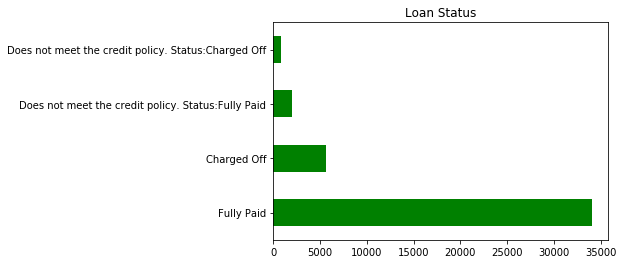

In [150]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'Green', title = 'Loan Status', alpha = 1.0)
plt.show()

In [151]:
loan_data = loan_data[(loan_data['loan_status'] == "Fully Paid") | (loan_data['loan_status'] == "Charged Off")]#using Chrged off and fully paid only

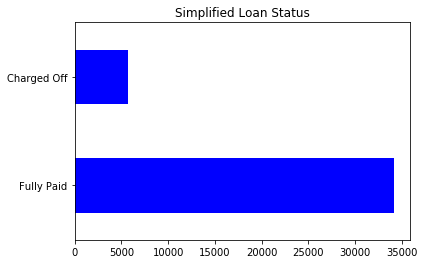

In [152]:
loan_data['loan_status'].value_counts().plot(kind= 'barh', color = 'blue', title = 'Simplified Loan Status', alpha = 1.0)
plt.show()

In [153]:
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
loan_data = loan_data.replace(status_replace)

In [154]:
loan_data['loan_status'].value_counts()

1    34116
0     5670
Name: loan_status, dtype: int64

In [155]:
loan_data.shape


(39786, 35)

In [156]:
#Final data cleaning...
orig_columns = loan_data.columns
drop_columns = []
for col in orig_columns:
    col_series = loan_data[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan_data = loan_data.drop(drop_columns, axis = 1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens',
 'hardship_flag',
 'disbursement_method']

In [157]:
loan_data.shape

(39786, 24)

In [158]:
#ANALYSING DATA
#Methodology
#Preparing The Features: Dealing With Missing Values

In [159]:
null_counts = loan_data.isnull().sum()
null_counts

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1078
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
title                     11
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
debt_settlement_flag       0
dtype: int64

In [160]:
loan_data = loan_data.drop("pub_rec_bankruptcies", axis=1)
loan_data = loan_data.dropna(axis=0)#Droping row

In [161]:
loan_data.shape

(38649, 23)

In [162]:
#HAndling Non numeric Data
print(loan_data.dtypes.value_counts())

object     12
float64    10
int64       1
dtype: int64


In [163]:
object_columns_df = loan_data.select_dtypes(include=["object"])
print (object_columns_df.iloc[0])

term                      36 months
int_rate                     10.65%
emp_length                10+ years
home_ownership                 RENT
verification_status        Verified
purpose                 credit_card
title                      Computer
addr_state                       AZ
earliest_cr_line           Jan-1985
revol_util                    83.7%
last_credit_pull_d         May-2018
debt_settlement_flag              N
Name: 0, dtype: object


In [164]:
columns = ['term', 'emp_length', 'home_ownership', 'verification_status', 'addr_state']
for col in columns:
    print (loan_data[col].value_counts())
    print (" ")

 36 months    28234
 60 months    10415
Name: term, dtype: int64
 
10+ years    8897
< 1 year     4576
2 years      4389
3 years      4094
4 years      3435
5 years      3279
1 year       3240
6 years      2227
7 years      1771
8 years      1483
9 years      1258
Name: emp_length, dtype: int64
 
RENT        18471
MORTGAGE    17242
OWN          2837
OTHER          96
NONE            3
Name: home_ownership, dtype: int64
 
Not Verified       16468
Verified           12377
Source Verified     9804
Name: verification_status, dtype: int64
 
CA    6907
NY    3711
FL    2779
TX    2674
NJ    1825
IL    1487
PA    1481
VA    1378
GA    1358
MA    1313
OH    1190
MD    1034
AZ     832
WA     807
CO     769
NC     761
CT     734
MI     688
MO     661
MN     591
NV     482
SC     464
WI     445
OR     436
AL     433
LA     426
KY     323
OK     293
KS     260
UT     253
AR     235
DC     212
RI     197
NM     184
HI     169
WV     168
NH     162
DE     110
WY      79
MT      79
AK      79
SD     

In [165]:
print (loan_data["purpose"].value_counts())
print (" ")
print (loan_data["title"].value_counts())

debt_consolidation    18262
credit_card            5004
other                  3824
home_improvement       2884
major_purchase         2109
small_business         1783
car                    1497
wedding                 934
medical                 668
moving                  557
house                   369
vacation                351
educational             312
renewable_energy         95
Name: purpose, dtype: int64
 
Debt Consolidation                                                                2149
Debt Consolidation Loan                                                           1695
Personal Loan                                                                      643
Consolidation                                                                      510
debt consolidation                                                                 489
Credit Card Consolidation                                                          349
Home Improvement                                        

In [166]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    }
}
loan_data = loan_data.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
loan_data["int_rate"] = loan_data["int_rate"].str.rstrip("%").astype("float")
loan_data["revol_util"] = loan_data["revol_util"].str.rstrip("%").astype("float")
loan_data = loan_data.replace(mapping_dict)

In [167]:
categorical_columns = ["home_ownership", "verification_status", "emp_length", "purpose", "term"]
dummy_df = pd.get_dummies(loan_data[categorical_columns])
loan_data = pd.concat([loan_data, dummy_df], axis=1)
loan_data = loan_data.drop(categorical_columns, axis=1)

In [168]:
loan_data.head()

loan_amnt  int_rate  installment  annual_inc  loan_status    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc debt_settlement_flag  home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding  term_ 36 months  term_ 60 months
0     5000.0     10.65       162.87     24000.0            1  27.65          0.0             1.0       3.0      0.0    13648.0        83.7        9.0                    N                        0                    0                     0                   0                    1                                 0                                    0                             1            0                    1                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                1                0
1     2500.0     15.27        59.83     30000.0            0   1.00          0.0             5.0       3.0      0.0     1687.0         9.4        4.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            1                    0                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                0                1
2     2400.0     15.96        84.33     12252.0            1   8.72          0.0             2.0       2.0      0.0     2956.0        98.5       10.0                    N                        0                    0                     0                   0                    1                                 1                                    0                             0            0                    0                           0                    0                         0              0                       0                0               0              0                         0                       1                 0                0                1                0
3    10000.0     13.49       339.31     49200.0            1  20.00          0.0             1.0      10.0      0.0     5598.0        21.0       37.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                       0                0               0              1                         0                       0                 0                0                1                0
4     3000.0     12.69        67.79     80000.0            1  17.94          0.0             0.0      15.0      0.0    27783.0        53.9       38.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                   

In [169]:
#cleaned and filtered data to csv
loan_data.to_csv('clean_loan_data.csv', index = False)

In [170]:
# Model Evaluation And Validation
#Machine Learning Algorithm Fitting

In [171]:
loan_data = pd.read_csv('clean_loan_data.csv')

In [172]:
loan_data

loan_amnt  int_rate  installment  annual_inc  loan_status    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc debt_settlement_flag  home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding  term_ 36 months  term_ 60 months
0         5000.0     10.65       162.87    24000.00            1  27.65          0.0             1.0       3.0      0.0    13648.0       83.70        9.0                    N                        0                    0                     0                   0                    1                                 0                                    0                             1            0                    1                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                1                0
1         2500.0     15.27        59.83    30000.00            0   1.00          0.0             5.0       3.0      0.0     1687.0        9.40        4.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            1                    0                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                0                1
2         2400.0     15.96        84.33    12252.00            1   8.72          0.0             2.0       2.0      0.0     2956.0       98.50       10.0                    N                        0                    0                     0                   0                    1                                 1                                    0                             0            0                    0                           0                    0                         0              0                       0                0               0              0                         0                       1                 0                0                1                0
3        10000.0     13.49       339.31    49200.00            1  20.00          0.0             1.0      10.0      0.0     5598.0       21.00       37.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                       0                0               0              1                         0                       0                 0                0                1                0
4         3000.0     12.69        67.79    80000.00            1  17.94          0.0             0.0      15.0      0.0    27783.0       53.90       38.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              

In [173]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38649 entries, 0 to 38648
Data columns (total 38 columns):
loan_amnt                              38649 non-null float64
int_rate                               38649 non-null float64
installment                            38649 non-null float64
annual_inc                             38649 non-null float64
loan_status                            38649 non-null int64
dti                                    38649 non-null float64
delinq_2yrs                            38649 non-null float64
inq_last_6mths                         38649 non-null float64
open_acc                               38649 non-null float64
pub_rec                                38649 non-null float64
revol_bal                              38649 non-null float64
revol_util                             38649 non-null float64
total_acc                              38649 non-null float64
debt_settlement_flag                   38649 non-null object
home_ownership_MORTGAGE   

In [174]:
predictions = pd.Series(np.ones(loan_data.shape[0]))
print ('prediction is:',predictions)




('prediction is:', 0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0
7        1.0
8        1.0
9        1.0
10       1.0
11       1.0
12       1.0
13       1.0
14       1.0
15       1.0
16       1.0
17       1.0
18       1.0
19       1.0
20       1.0
21       1.0
22       1.0
23       1.0
24       1.0
25       1.0
26       1.0
27       1.0
28       1.0
29       1.0
30       1.0
31       1.0
32       1.0
33       1.0
34       1.0
35       1.0
36       1.0
37       1.0
38       1.0
39       1.0
40       1.0
41       1.0
42       1.0
43       1.0
44       1.0
45       1.0
46       1.0
47       1.0
48       1.0
49       1.0
50       1.0
51       1.0
52       1.0
53       1.0
54       1.0
55       1.0
56       1.0
57       1.0
58       1.0
59       1.0
60       1.0
61       1.0
62       1.0
63       1.0
64       1.0
65       1.0
66       1.0
67       1.0
68       1.0
69       1.0
70       1.0
71       1.0
72       1.0
73       1.0
74       1.0
75    

In [175]:
FP_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
FP = len(predictions[FP_filter])
print (FP)

5423


In [176]:
TP_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
TP = len(predictions[TP_filter])
print (TP)

33226


In [177]:
FN_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
FN = len(predictions[FN_filter])
print (FN)

0


In [178]:
TN_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
TN = len(predictions[TN_filter])
print (TN)

0


In [179]:
TP_rate =  TP /(TP + FN)
print (float(TP_rate))

1.0


In [180]:
FP_rate = FP / (FP + TN)
print (float(FP_rate))

1.0


In [181]:
accuracy = float(TP + TN)/float(TP + FP+ FN + TN)
print ('percenteage accuracy is:-',accuracy*100)


('percenteage accuracy is:-', 85.96858909674248)


In [182]:
precision = float(TP)/float(TP + FP)
print ('percentage precision is:-',precision*100)

('percentage precision is:-', 85.96858909674248)


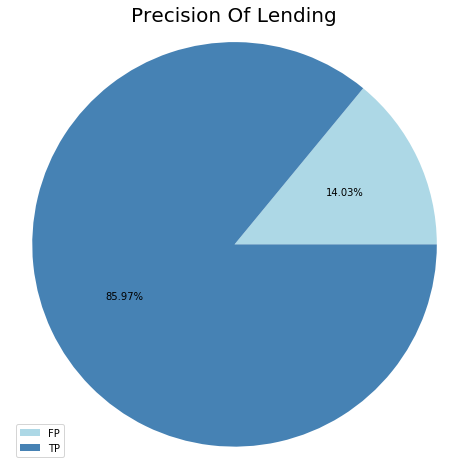

In [183]:
# Data to plot
labels = 'FP', 'TP'
sizes = [1-precision, precision]
colors = ['lightblue','steelblue'] 
# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision Of Lending', fontsize=20) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [184]:
loan_data.head()

loan_amnt  int_rate  installment  annual_inc  loan_status    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc debt_settlement_flag  home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding  term_ 36 months  term_ 60 months
0     5000.0     10.65       162.87     24000.0            1  27.65          0.0             1.0       3.0      0.0    13648.0        83.7        9.0                    N                        0                    0                     0                   0                    1                                 0                                    0                             1            0                    1                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                1                0
1     2500.0     15.27        59.83     30000.0            0   1.00          0.0             5.0       3.0      0.0     1687.0         9.4        4.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            1                    0                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                0                1
2     2400.0     15.96        84.33     12252.0            1   8.72          0.0             2.0       2.0      0.0     2956.0        98.5       10.0                    N                        0                    0                     0                   0                    1                                 1                                    0                             0            0                    0                           0                    0                         0              0                       0                0               0              0                         0                       1                 0                0                1                0
3    10000.0     13.49       339.31     49200.0            1  20.00          0.0             1.0      10.0      0.0     5598.0        21.0       37.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                       0                0               0              1                         0                       0                 0                0                1                0
4     3000.0     12.69        67.79     80000.0            1  17.94          0.0             0.0      15.0      0.0    27783.0        53.9       38.0                    N                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                   

In [185]:
loan_data = loan_data.drop(['debt_settlement_flag'], axis =1)

In [186]:
loan_data.head()

loan_amnt  int_rate  installment  annual_inc  loan_status    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding  term_ 36 months  term_ 60 months
0     5000.0     10.65       162.87     24000.0            1  27.65          0.0             1.0       3.0      0.0    13648.0        83.7        9.0                        0                    0                     0                   0                    1                                 0                                    0                             1            0                    1                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                1                0
1     2500.0     15.27        59.83     30000.0            0   1.00          0.0             5.0       3.0      0.0     1687.0         9.4        4.0                        0                    0                     0                   0                    1                                 0                                    1                             0            1                    0                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                0                1
2     2400.0     15.96        84.33     12252.0            1   8.72          0.0             2.0       2.0      0.0     2956.0        98.5       10.0                        0                    0                     0                   0                    1                                 1                                    0                             0            0                    0                           0                    0                         0              0                       0                0               0              0                         0                       1                 0                0                1                0
3    10000.0     13.49       339.31     49200.0            1  20.00          0.0             1.0      10.0      0.0     5598.0        21.0       37.0                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                       0                0               0              1                         0                       0                 0                0                1                0
4     3000.0     12.69        67.79     80000.0            1  17.94          0.0             0.0      15.0      0.0    27783.0        53.9       38.0                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                       0                0               0              1                         0                       0                 0     

In [187]:
#APPLYING LOGISTIC REGRESSION 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

col = loan_data.columns
train_col = col.drop('loan_status')

features = loan_data[train_col]

target = loan_data['loan_status']

lr.fit(features, target)
predictions = lr.predict(features)

In [188]:
#CROSS VALIDATION
from sklearn.cross_validation import cross_val_predict, KFold
lr = LogisticRegression()
kf = KFold(features.shape[0], random_state=42)
predictions = cross_val_predict(lr, features, target, cv=kf)
predictions = pd.Series(predictions)

In [189]:
FP_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
FP = len(predictions[FP_filter])

TP_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
TP = len(predictions[TP_filter])

FN_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
FN = len(predictions[FN_filter])

TN_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
TN= len(predictions[TN_filter])

TP_rate = float(TP)/float((TP + FN))
FP_rate = float(FP)/float((FP + TN))

print (float(TP_rate)) 
print (float(FP_rate))

0.999187383374
0.998709201549


In [190]:
precision = float(TP)/float(TP + FP)
print (precision)
print('Percentage precision using Logistic Regression is',precision*100)

0.859743622944
('Percentage precision using Logistic Regression is', 85.97436229444516)


In [191]:
accuracy = float(TP + TN)/float(TP + FP + FN + TN)
print (accuracy)
print('Percentage accuracy using Logistic Regression is',accuracy*100)

0.859168413154
('Percentage accuracy using Logistic Regression is', 85.9168413154286)


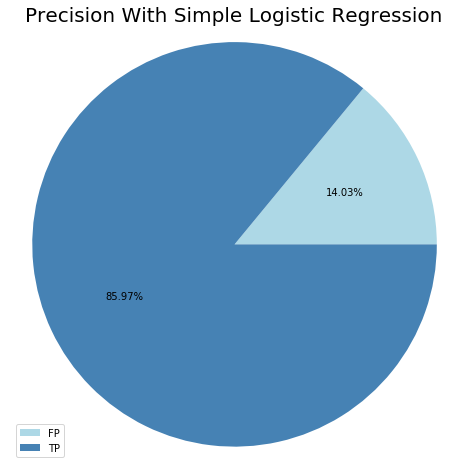

In [192]:
# Data to plot
labels = 'FP', 'TP'
sizes = [1-precision, precision]
colors = ['lightblue','steelblue'] 
# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision With Simple Logistic Regression', fontsize=20) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()


In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_predict

rf = DecisionTreeClassifier(class_weight="balanced", random_state=1)
kf = KFold(features.shape[0], random_state=42)

predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

In [194]:
FP_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
FP = len(predictions[FP_filter])

TP_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
TP = len(predictions[TP_filter])

FN_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
FN = len(predictions[FN_filter])

TN_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
TN = len(predictions[FN_filter])

TP_rate = float(TP)/float((FP + FN))
FP_rate = float(FP)/float((FP + TN))

print (float(FP_rate)) 
print (float(FP_rate))

0.503867151956
0.503867151956


In [195]:
accuracy = float(TP + TN)/float(TP + FP+ FN + TN)
print (accuracy)
print ('Percentage accuracy using Decision tree is',accuracy*100)

0.79075634252
('Percentage accuracy using Decision tree is', 79.07563425198725)


In [196]:
precision = float(TP)/float(TP + FP)
print (precision)
print ('Percentage precision using Decision Tree is',precision*100)

0.866942992731
('Percentage precision using Decision Tree is', 86.6942992731423)


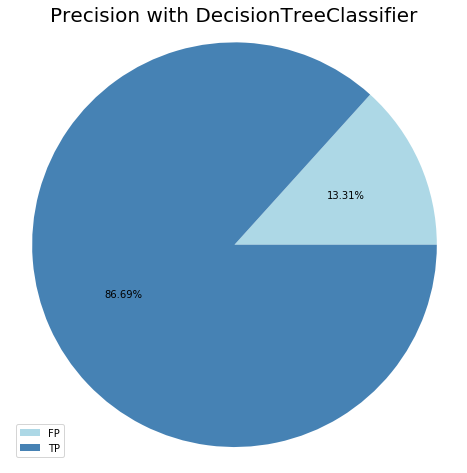

In [197]:
# Data to plot
labels = 'FP', 'TP'
sizes = [1-precision, precision]
colors = ['lightblue','steelblue'] 
# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision with DecisionTreeClassifier', fontsize=20) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [198]:
loan_data.head()

loan_amnt  int_rate  installment  annual_inc  loan_status    dti  delinq_2yrs  inq_last_6mths  open_acc  pub_rec  revol_bal  revol_util  total_acc  home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  verification_status_Source Verified  verification_status_Verified  purpose_car  purpose_credit_card  purpose_debt_consolidation  purpose_educational  purpose_home_improvement  purpose_house  purpose_major_purchase  purpose_medical  purpose_moving  purpose_other  purpose_renewable_energy  purpose_small_business  purpose_vacation  purpose_wedding  term_ 36 months  term_ 60 months
0     5000.0     10.65       162.87     24000.0            1  27.65          0.0             1.0       3.0      0.0    13648.0        83.7        9.0                        0                    0                     0                   0                    1                                 0                                    0                             1            0                    1                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                1                0
1     2500.0     15.27        59.83     30000.0            0   1.00          0.0             5.0       3.0      0.0     1687.0         9.4        4.0                        0                    0                     0                   0                    1                                 0                                    1                             0            1                    0                           0                    0                         0              0                       0                0               0              0                         0                       0                 0                0                0                1
2     2400.0     15.96        84.33     12252.0            1   8.72          0.0             2.0       2.0      0.0     2956.0        98.5       10.0                        0                    0                     0                   0                    1                                 1                                    0                             0            0                    0                           0                    0                         0              0                       0                0               0              0                         0                       1                 0                0                1                0
3    10000.0     13.49       339.31     49200.0            1  20.00          0.0             1.0      10.0      0.0     5598.0        21.0       37.0                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                       0                0               0              1                         0                       0                 0                0                1                0
4     3000.0     12.69        67.79     80000.0            1  17.94          0.0             0.0      15.0      0.0    27783.0        53.9       38.0                        0                    0                     0                   0                    1                                 0                                    1                             0            0                    0                           0                    0                         0              0                       0                0               0              1                         0                       0                 0     

In [199]:
loan_data.shape

(38649, 37)

In [200]:
from sklearn.cross_validation import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
#()
rf = AdaBoostClassifier(n_estimators=50)
kf = KFold(features.shape[0], random_state=42)

predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

In [201]:
FP_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
FP = len(predictions[FP_filter])

TP_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
TP = len(predictions[TP_filter])

FN_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
FN = len(predictions[FN_filter])

TN_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
TN = len(predictions[FN_filter])

TP_rate = float(TP)/float((FP + FN))
FP_rate = float(FP)/float((FP + TN))

print (float(FP_rate)) 
print (float(FP_rate))

0.985104817948
0.985104817948


In [202]:
precision = float(TP)/float(TP + FP)
print (precision)
print ('Percentage precision using AdaBoostClassifier is',precision*100)

0.860864370682
('Percentage precision using AdaBoostClassifier is', 86.08643706820425)


In [203]:
accuracy = float(TP + TN)/float(TP + FP+ FN + TN)
print (accuracy)
print ('Percentage accuracy using AdaBoostClassifier is',accuracy*100)

0.859352369129
('Percentage accuracy using AdaBoostClassifier is', 85.93523691289055)


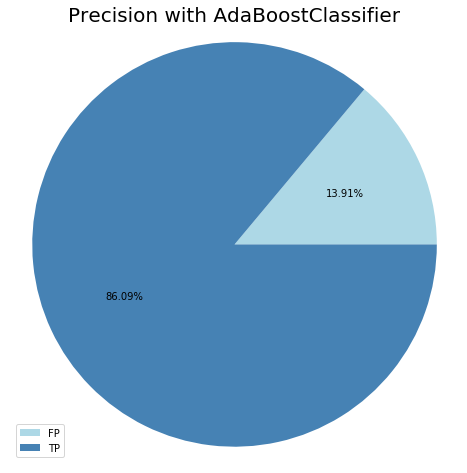

In [204]:
# Data to plot
labels = 'FP', 'TP'
sizes = [1-precision, precision]
colors = ['lightblue','steelblue'] 
# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision with AdaBoostClassifier', fontsize=20) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [205]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_predict

rf = RandomForestClassifier(class_weight="balanced", random_state=1)
kf = KFold(features.shape[0], random_state=42)

predictions = cross_val_predict(rf, features, target, cv=kf)
predictions = pd.Series(predictions)

In [206]:
FP_filter = (predictions == 1) & (loan_data['loan_status'] == 0)
FP = len(predictions[FP_filter])

TP_filter = (predictions == 1) & (loan_data['loan_status'] == 1)
TP = len(predictions[TP_filter])

FN_filter = (predictions == 0) & (loan_data['loan_status'] == 1)
FN = len(predictions[FN_filter])

TN_filter = (predictions == 0) & (loan_data['loan_status'] == 0)
TN = len(predictions[FN_filter])

TP_rate = float(TP)/float((FP + FN))
FP_rate = float(FP)/float((FP + TN))

print (float(FP_rate)) 
print (float(FP_rate))

0.868129998298
0.868129998298


In [207]:
precision = float(TP)/float(TP + FP)
print (precision)
print ('Percentage precision using RandomForestClassifier is',precision*100)

0.864138683993
('Percentage precision using RandomForestClassifier is', 86.41386839932895)


In [208]:
accuracy = float(TP + TN)/float(TP + FP+ FN + TN)
print (accuracy)
print ('Percentage accuracy using RandomForestClassifier is',accuracy*100)

0.849704626244
('Percentage accuracy using RandomForestClassifier is', 84.97046262435107)


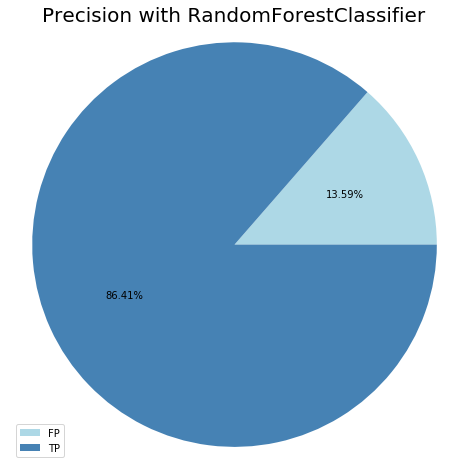

In [209]:
# Data to plot
labels = 'FP', 'TP'
sizes = [1-precision, precision]
colors = ['lightblue','steelblue'] 
# Plot
plt.figure(figsize=(8,8))
plt.pie(sizes, colors=colors, autopct='%1.2f%%', shadow=False, startangle=0)
plt.title('Precision with RandomForestClassifier', fontsize=20) 
plt.legend(labels, loc='lower left', fontsize=10)
plt.axis('equal')
plt.show()

In [210]:
# prepare configuration for cross validation test harness
array = loan_data.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ADB', AdaBoostClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)



LR: 0.111387 (0.006017)
CART: 0.091697 (0.004691)
RFC: 0.100805 (0.004756)
ADB: 0.104142 (0.006117)
